# Machine Learning: scikit-learn

(part of the contents are adapted from http://scipy-lectures.org/packages/scikit-learn/index.html)

(decision tree from https://www.kaggle.com/dmilla/introduction-to-decision-trees-titanic-dataset/notebook)

(random forest from https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn)

## contents

   - [Introduction: problem settings](#intr-prob-set)
   - [Basic principles of machine learning with scikit-learn](#basic-prin)
   - [Supervised Learning: Classification of Handwritten Digits](#hand-digi)
   - [Supervised Learning: Decision Tree](#dec-tree)
   - [Supervised Learning: Regression of Housing Data](#reg-housing)
   - [Measuring Prediction Performance](#measure-perf)
   - [Unsupervised Learning: Dimensionality Reduction and Visualization](#dim-reduct)
   - [The Eigenfaces Example: Chaining PCA and SVMs](#pca-svm)
   - [Parameter Selection, Validation, and Testing](#param-val-test)
   - [Ensemble Learning: Random Forest](#rnd-forest)


| Model/Type | Supervised Classification | Supervised Regression | Unsupervised |
| --- | --- | --- | --- |
| Linear Regression | N | Y | N |
| Loggistic Regression | Y | N | N |
| PCA | N | N | Y |
| SVM | Y | N | N | 
| Decision Tree | Y | Y | N | 

## <a name="intr-prob-set"></a>Introduction: problem settings

### What is machine learning?

Machine Learning is about building programs with tunable parameters that are adjusted automatically so as to improve their behavior by adapting to previously seen data.

Machine Learning can be considered a subfield of Artificial Intelligence since those algorithms can be seen as building blocks to make computers learn to behave more intelligently by somehow generalizing rather that just storing and retrieving data items like a database system would do.


#### A classification problem

We’ll take a look at two very simple machine learning tasks here. The first is a classification task: the figure shows a collection of two-dimensional data, colored according to two different class labels. A classification algorithm may be used to draw a dividing boundary between the two clusters of points:

By drawing this separating line, we have learned a model which can generalize to new data: if you were to drop another point onto the plane which is unlabeled, this algorithm could now predict whether it’s a blue or a red point.

![classification.png](../images/classification.png)


#### A regression problem

The next simple task we’ll look at is a regression task: a simple best-fit line to a set of data.

Again, this is an example of fitting a model to data, but our focus here is that the model can make generalizations about new data. The model has been learned from the training data, and can be used to predict the result of test data: here, we might be given an x-value, and the model would allow us to predict the y value.

![linearregression.png](../images/linearregression.png)

### Data in scikit-learn

#### The data matrix

Machine learning algorithms implemented in scikit-learn expect data to be stored in a two-dimensional array or matrix. The arrays can be either numpy arrays, or in some cases scipy.sparse matrices. The size of the array is expected to be [n_samples, n_features]

* n_samples: The number of samples: each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, an astronomical object, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.
* n_features: The number of features or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be boolean or discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. This is a case where scipy.sparse matrices can be useful, in that they are much more memory-efficient than numpy arrays. 

#### A Simple Example: the Iris Dataset

##### The application problem

As an example of a simple dataset, let us a look at the iris data stored by scikit-learn. Suppose we want to recognize species of irises. The data consists of measurements of three different species of irises:
 	
###### Setosa Iris 		
![iris_setosa.jpg](../images/iris_setosa.jpg)
######  Versicolor Iris 
![iris_versicolor.jpg](../images/iris_versicolor.jpg)
######  Virginica Iris
![iris_virginica.jpg](../images/iris_virginica.jpg)


##### Loading the Iris Data with Scikit-learn

Scikit-learn has a very straightforward set of data on these iris species. The data consist of the following:

* Features in the Iris dataset:
        sepal length (cm), sepal width (cm), petal length (cm), petal width (cm) 
* Target classes to predict:
        Setosa, Versicolour, Virginica 

scikit-learn embeds a copy of the iris CSV file along with a function to load it into numpy arrays:

**Note**

scikit-learn is imported as sklearn 

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
print(iris.data.shape)
n_samples, n_features = iris.data.shape

(150, 4)


In [3]:
print(iris.data[0])

[5.1 3.5 1.4 0.2]


In [4]:
# The information about the class of each sample is stored in the target attribute of the dataset:
print(iris.target.shape)

(150,)


In [5]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
# The names of the classes are stored in the last attribute, namely target_names:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four-dimensional, but we can visualize two of the dimensions at a time using a scatter plot:

In [7]:
from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

## <a name="basic-prin"></a>Basic principles of machine learning with scikit-learn

### Introducing the scikit-learn estimator object

Every algorithm is exposed in scikit-learn via an ‘’Estimator’’ object. For instance a linear regression is: sklearn.linear_model.LinearRegression

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# Estimator parameters: All the parameters of an estimator can be set when it is instantiated:

model = LinearRegression(normalize=True)
print(model.normalize)

True


In [10]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


#### Fitting on data

Let’s create some simple data with numpy:

In [11]:
import numpy as np

x = np.array([0, 1, 2])
y = np.array([0, 1, 2])
X = x[:, np.newaxis] # The input data for sklearn is 2D: (samples == 3 x features == 1)
X

array([[0],
       [1],
       [2]])

In [12]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [13]:
# Estimated parameters: When data is fitted with an estimator, parameters are estimated 
# from the data at hand. All the estimated parameters are attributes of the estimator 
# object ending by an underscore:

model.coef_

array([1.])

### Supervised Learning: Classification and regression

In Supervised Learning, we have a dataset consisting of both features and labels. The task is to construct an estimator which is able to predict the label of an object given the set of features. A relatively simple example is predicting the species of iris given a set of measurements of its flower. This is a relatively simple task. Some more complicated examples are:

* given a multicolor image of an object through a telescope, determine whether that object is a star, a quasar, or a galaxy.
* given a photograph of a person, identify the person in the photo.
* given a list of movies a person has watched and their personal rating of the movie, recommend a list of movies they would like (So-called recommender systems: a famous example is the Netflix Prize).

What these tasks have in common is that there is one or more unknown quantities associated with the object which needs to be determined from other observed quantities.

Supervised learning is further broken down into two categories, classification and regression. In classification, the label is discrete, while in regression, the label is continuous. For example, in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a classification problem: the label is from three distinct categories. On the other hand, we might wish to estimate the age of an object based on such observations: this would be a regression problem, because the label (age) is a continuous quantity.

**Classification** : K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class. Let’s try it out on our iris classification problem:



In [14]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print(iris.target_names[knn.predict([[3, 5, 4, 2]])])


['virginica']


In [15]:
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                    # avoid this ugly slicing by using a two-dim dataset
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

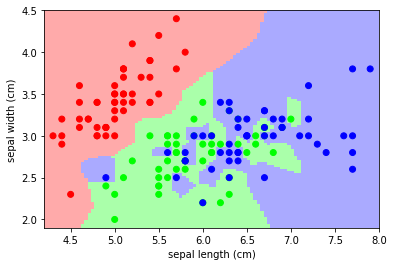

In [16]:
# Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

plt.show()

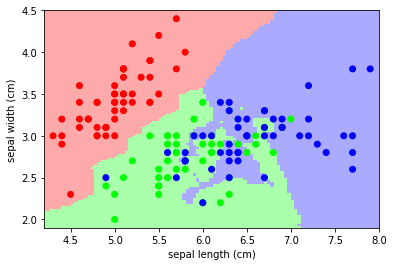

In [17]:
# And now, redo the analysis with 3 neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

plt.show()

Classification using simulated data

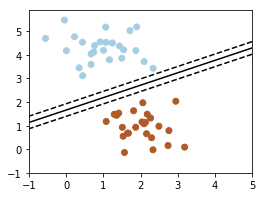

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs

# we create 50 separable synthetic points
X, Y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01,
                    max_iter=1000, tol=0.1, fit_intercept=True)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.contour(X1, X2, Z, [-1.0, 0.0, 1.0], colors='k',
           linestyles=['dashed', 'solid', 'dashed'])
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

ax.axis('tight')


plt.show()

**Regression** : The simplest possible regression setting is the linear regression one:

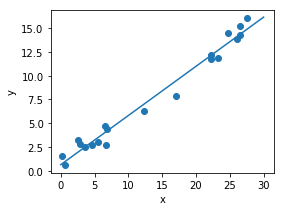

In [19]:
from sklearn.linear_model import LinearRegression

# x from 0 to 30
x = 30 * np.random.random((20, 1))

# y = a*x + b with noise
y = 0.5 * x + 1.0 + np.random.normal(size=x.shape)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')


plt.show()

### A recap on Scikit-learn’s estimator interface

Scikit-learn strives to have a uniform interface across all methods, and we’ll see examples of these below. Given a scikit-learn estimator object named model, the following methods are available:

####  In all Estimators:
 	
* model.fit() : fit training data. For supervised learning applications, this accepts two arguments: the data X and the labels y (e.g. model.fit(X, y)). For unsupervised learning applications, this accepts only a single argument, the data X (e.g. model.fit(X)).

#### In supervised estimators:
 	
* model.predict() : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data X_new (e.g. model.predict(X_new)), and returns the learned label for each object in the array.

* model.predict_proba() : For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by model.predict().

* model.score() : for classification or regression problems, most (all?) estimators implement a score method. Scores are between 0 and 1, with a larger score indicating a better fit.

#### In unsupervised estimators:

* model.transform() : given an unsupervised model, transform new data into the new basis. This also accepts one argument X_new, and returns the new representation of the data based on the unsupervised model.

* model.fit_transform() : some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.


#### Regularization: what it is and why it is necessary

##### Prefering simpler models

**Train errors** Suppose you are using a 1-nearest neighbor estimator. How many errors do you expect on your train set?

* Train set error is not a good measurement of prediction performance. You need to leave out a test set.
* In general, we should accept errors on the train set.

**An example of regularization** The core idea behind regularization is that we are going to prefer models that are simpler, for a certain definition of ‘’simpler’‘, even if they lead to more errors on the train set.

As an example, let’s generate with a 9th order polynomial, with noise:

In [20]:
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn import linear_model

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


rng = np.random.RandomState(0)
x = 2*rng.rand(100) - 1

f = lambda t: 1.2 * t**2 + .1 * t**3 - .4 * t **5 - .5 * t ** 9
y = f(x) + .4 * rng.normal(size=100)

x_test = np.linspace(-1, 1, 100)



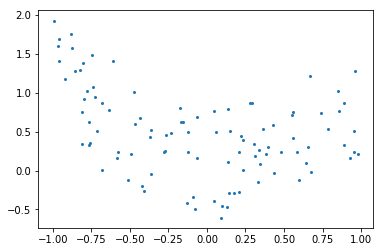

In [21]:
# The data

plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)


plt.show()

And now, let’s fit a 4th order and a 9th order polynomial to the data.
For this we need to engineer features: the n_th powers of x:



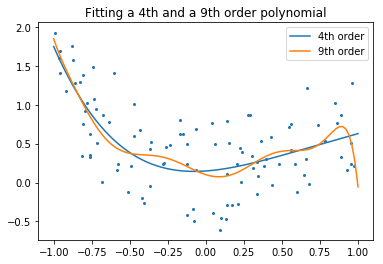

In [22]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)

X = np.array([x**i for i in range(5)]).T
X_test = np.array([x_test**i for i in range(5)]).T
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(x_test, regr.predict(X_test), label='4th order')

X = np.array([x**i for i in range(10)]).T
X_test = np.array([x_test**i for i in range(10)]).T
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(x_test, regr.predict(X_test), label='9th order')

plt.legend(loc='best')
plt.axis('tight')
plt.title('Fitting a 4th and a 9th order polynomial')

plt.show()

With your naked eyes, which model do you prefer, the 4th order one, or the 9th order one?
Let’s look at the **ground truth**:

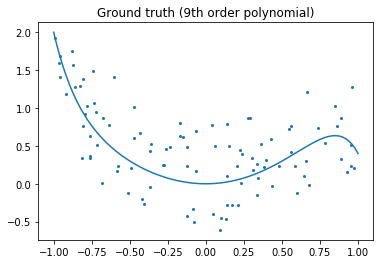

In [23]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)
plt.plot(x_test, f(x_test), label="truth")
plt.axis('tight')
plt.title('Ground truth (9th order polynomial)')

plt.show()

Regularization is ubiquitous in machine learning. Most scikit-learn estimators have a parameter to tune the amount of regularization. For instance, with k-NN, it is ‘k’, the number of nearest neighbors used to make the decision. k=1 amounts to no regularization: 0 error on the training set, whereas large k will push toward smoother decision boundaries in the feature space.

#### Simple versus complex models for classification

##### data that is linearly separable

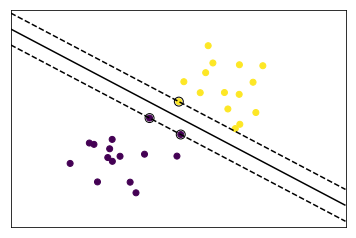

In [24]:
from sklearn import svm

def linear_model(rseed=42, n_samples=30):
    " Generate data according to a linear model"
    np.random.seed(rseed)

    data = np.random.normal(0, 10, (n_samples, 2))
    data[:n_samples // 2] -= 15
    data[n_samples // 2:] += 15

    labels = np.ones(n_samples)
    labels[:n_samples // 2] = -1

    return data, labels


X, y = linear_model()
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

plt.figure(figsize=(6, 4))
ax = plt.subplot(111, xticks=[], yticks=[])
ax.scatter(X[:, 0], X[:, 1], c=y-np.min(y))

ax.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=80, edgecolors="k", facecolors="none")

delta = 1
y_min, y_max = -50, 50
x_min, x_max = -50, 50
x = np.arange(x_min, x_max + delta, delta)
y = np.arange(y_min, y_max + delta, delta)
X1, X2 = np.meshgrid(x, y)
Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

ax.contour(X1, X2, Z, [-1.0, 0.0, 1.0], colors='k',
           linestyles=['dashed', 'solid', 'dashed'])
plt.show()

##### data with a non-linear separation

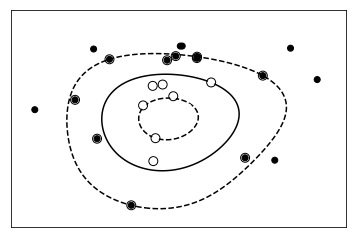

In [25]:


def nonlinear_model(rseed=42, n_samples=30):
    radius = 40 * np.random.random(n_samples)
    far_pts = radius > 20
    radius[far_pts] *= 1.2
    radius[~far_pts] *= 1.1

    theta = np.random.random(n_samples) * np.pi * 2

    data = np.empty((n_samples, 2))
    data[:, 0] = radius * np.cos(theta)
    data[:, 1] = radius * np.sin(theta)

    labels = np.ones(n_samples)
    labels[far_pts] = -1

    return data, labels


X, y = nonlinear_model()
clf = svm.SVC(kernel='rbf', gamma=0.001, coef0=0, degree=3)
clf.fit(X, y)

plt.figure(figsize=(6, 4))
ax = plt.subplot(1, 1, 1, xticks=[], yticks=[])
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bone, zorder=2)

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=80, edgecolors="k", facecolors="none")

delta = 1
y_min, y_max = -50, 50
x_min, x_max = -50, 50
x = np.arange(x_min, x_max + delta, delta)
y = np.arange(y_min, y_max + delta, delta)
X1, X2 = np.meshgrid(x, y)
Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

ax.contour(X1, X2, Z, [-1.0, 0.0, 1.0], colors='k',
            linestyles=['dashed', 'solid', 'dashed'], zorder=1)

plt.show()

For classification models, the decision boundary, that separates the class expresses the complexity of the model. For instance, a linear model, that makes a decision based on a linear combination of features, is more complex than a non-linear one.

## <a name="hand-digi"></a>Supervised Learning: Classification of Handwritten Digits

### The nature of the data

In this section we’ll apply scikit-learn to the classification of handwritten digits. This will go a bit beyond the iris classification we saw before: we’ll discuss some of the metrics which can be used in evaluating the effectiveness of a classification model.

Plot the first few samples of the digits dataset and a 2D representation built using PCA, then do a simple classification

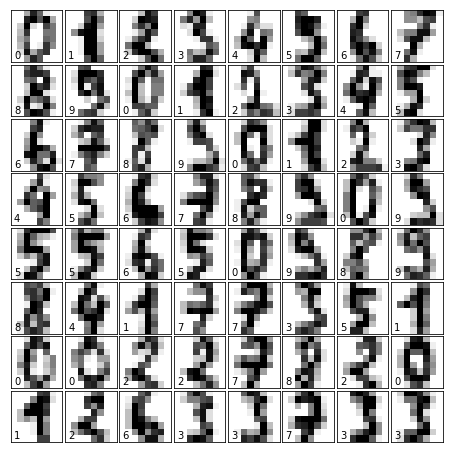

In [26]:
from sklearn.datasets import load_digits

digits = load_digits()

fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))
    
plt.show()

### Visualizing the Data on its principal components

A good first-step for many problems is to visualize the data using a Dimensionality Reduction technique. We’ll start with the most straightforward one, Principal Component Analysis (PCA).

PCA seeks orthogonal linear combinations of the features which show the greatest variance, and as such, can help give you a good idea of the structure of the data set.

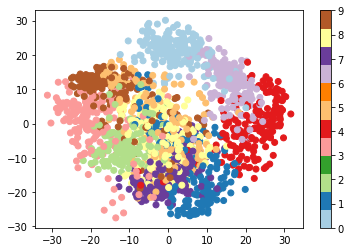

In [27]:
# Plot a projection on the 2 first principal axis

plt.figure()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

plt.show()

### Gaussian Naive Bayes Classification

For most classification problems, it’s nice to have a simple, fast method to provide a quick baseline classification. If the simple and fast method is sufficient, then we don’t have to waste CPU cycles on more complex models. If not, we can use the results of the simple method to give us clues about our data.

One good method to keep in mind is Gaussian Naive Bayes (sklearn.naive_bayes.GaussianNB).

Gaussian Naive Bayes fits a Gaussian distribution to each training label independantly on each feature, and uses this to quickly give a rough classification. It is generally not sufficiently accurate for real-world data, but can perform surprisingly well, for instance on text data. 

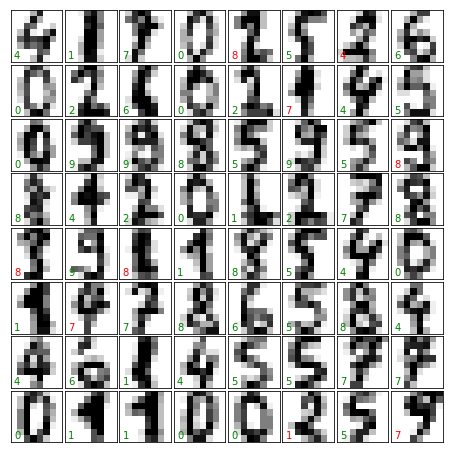

In [28]:
# Classify with Gaussian naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

plt.show()

### Quantitative Measurement of Performance

We’d like to measure the performance of our estimator without having to resort to plotting examples. A simple method might be to simply compare the number of matches:

In [29]:
matches = (predicted == expected)
print(matches.sum())

380


In [30]:
print(len(matches))

450


In [31]:
matches.sum() / float(len(matches))

0.8444444444444444

We see that more than 80% of the 450 predictions match the input. But there are other more sophisticated metrics that can be used to judge the performance of a classifier: several are available in the sklearn.metrics submodule.

One of the most useful metrics is the classification_report, which combines several measures and prints a table with the results:

In [32]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      0.95      0.98        42
          1       0.91      0.75      0.83        57
          2       0.97      0.71      0.82        52
          3       0.96      0.67      0.79        33
          4       0.93      0.89      0.91        46
          5       0.97      0.87      0.92        45
          6       0.95      1.00      0.98        41
          7       0.71      1.00      0.83        47
          8       0.51      0.86      0.64        44
          9       0.91      0.74      0.82        43

avg / total       0.88      0.84      0.85       450



Another enlightening metric for this sort of multi-label classification is a **confusion matrix**: it helps us visualize which labels are being interchanged in the classification errors:

In [33]:
print(metrics.confusion_matrix(expected, predicted))

[[40  0  0  0  1  1  0  0  0  0]
 [ 0 43  0  0  0  0  1  2 10  1]
 [ 0  2 37  0  1  0  1  0 11  0]
 [ 0  0  1 22  0  0  0  1  8  1]
 [ 0  0  0  0 41  0  0  4  1  0]
 [ 0  0  0  0  0 39  0  4  1  1]
 [ 0  0  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0  0  0 47  0  0]
 [ 0  2  0  1  0  0  0  3 38  0]
 [ 0  0  0  0  1  0  0  5  5 32]]


We see here that in particular, the numbers 1, 2, 3, and 9 are often being labeled 8.

## <a name="dec-tree"></a>Supervised Learning: Decision Tree

Decision trees are very simple yet powerful supervised learning methods, which constructs a decision tree model, that can be used to make predictions.

The main advantage of this model is that a human being can easily understand and reproduce the sequence of decisions (especially if the number of attributes is small) taken to predict the target class of a new instance. This is very important for tasks such as medical diagnosis or credit approval, where we want to show a reason for the decision, rather than just saying this is what the training data suggests.

The problem we would like to solve is to determine if a Titanic’s passenger would have survived, given her age, passenger class, and sex.

Preprocessing the data (titanic data can be downloaded from https://www.kaggle.com/dmilla/introduction-to-decision-trees-titanic-dataset/data)

### Preparing the Titanic dataset

For the Titanic challenge we need to guess wheter the individuals from the test dataset had survived or not. But for our current purpose let's also find out what can the data tell us about the shipwreck with the help of a Classification Tree. Let's load the data and get an overview.



In [34]:
import pandas as pd

train = pd.read_csv('../data/titanic_train.csv')
test = pd.read_csv('../data/titanic_test.csv')

# Store our test passenger IDs for easy access
PassengerId = test['PassengerId']

# Showing overview of the train dataset
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Thanks to this overview we can see that our dataset needs some treatment. The class Survived is already in binary format so no additional formatting is necessary, but features like Name, Ticket or Cabin need to be adapted for the problem we're trying to solve, and we can also engineer some new features by merging or regrouping existing ones. There's already extended work on this so we're just using one the best approches out there (credit to Sina, Anisotropic and also Megan Risdal for the suggestion of the "Title" feature).

In [35]:
import re

# Copy original dataset in case we need it later when digging into interesting features
# WARNING: Beware of actually copying the dataframe instead of just referencing it
# "original_train = train" will create a reference to the train variable (changes in 'train' will apply to 'original_train')
original_train = train.copy() # Using 'copy()' allows to clone the dataset, creating a different object with the same values

# Feature engineering steps taken from Sina and Anisotropic, with minor changes to avoid warnings
full_data = [train, test]

# Feature that tells whether a passenger had a cabin on the Titanic
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# Create new feature IsAlone from FamilySize
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
# Remove all NULLS in the Embarked column
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
# Remove all NULLS in the Fare column
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

# Remove all NULLS in the Age column
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    # Next line has been improved to avoid warning
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] ;


In [36]:
# Feature selection: remove variables no longer containing relevant information
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

### Visualising processed data

In [37]:
train.head(3)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,0,2,0,1
1,1,1,0,2,0,3,1,1,2,0,3
2,1,3,0,1,0,1,0,0,1,1,4


Our dataset is now much cleaner than before, with only numerical values and potentially meaningful features. Let's now explore the relationship between our variables by plotting the Pearson Correlation between all the attributes in our dataset (credit to Anisotropic for this beautiful plot):

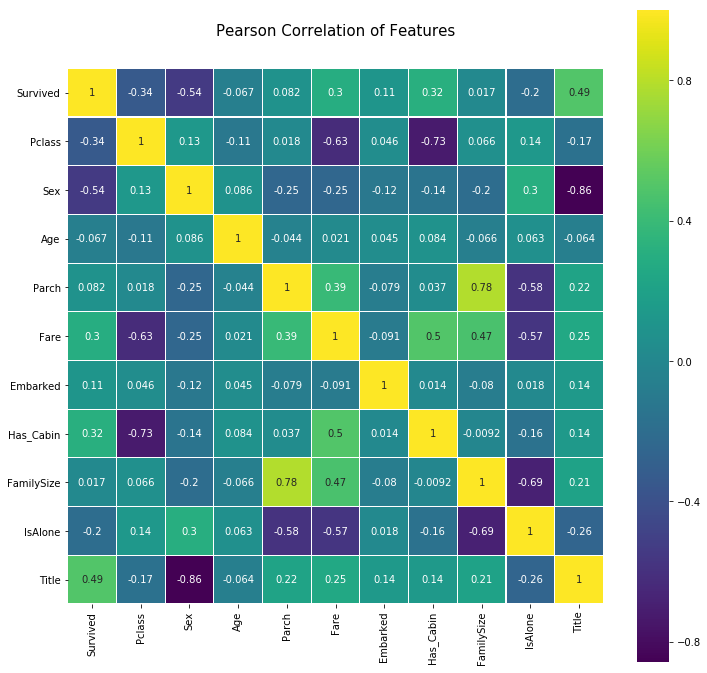

In [38]:
import seaborn as sns

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

plt.show()

This heatmap is very useful as an initial observation because you can easily get an idea of the predictive value of each feature. In this case, Sex and Title show the highest correlations (in absolute terms) with the class (Survived): 0.54 and 0.49 respectively. But the absolute correlation between both is also very high (0.86, the highest in our dataset), so they are probably carrying the same information and using the two as inputs for the same model wouldn't be a good idea. High chances are one of them will be used for the first node in our final decision tree, so let's first explore further these features and compare them.


#### Title VS Sex

You can easily compare features and their relationship with the class by grouping them and calculating some basic statistics for each group. The code below does exactly this in one line, and explains the meaning of each metric when working with a binary class.


In [39]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).agg(['mean', 'count', 'sum'])
# Since "Survived" is a binary class (0 or 1), these metrics grouped by the Title feature represent:
    # MEAN: survival rate
    # COUNT: total observations
    # SUM: people survived

# title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 


Survived           
           mean count  sum
Title                     
1      0.156673   517   81
2      0.575000    40   23
3      0.793651   126  100
4      0.702703   185  130
5      0.347826    23    8

In [40]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).agg(['mean', 'count', 'sum'])
# Since Survived is a binary feature, this metrics grouped by the Sex feature represent:
    # MEAN: survival rate
    # COUNT: total observations
    # SUM: people survived
    
# sex_mapping = {{'female': 0, 'male': 1}} 

Survived           
         mean count  sum
Sex                     
0    0.742038   314  233
1    0.188908   577  109

The data shows that less 'Mr' survived (15,67%) than men in general (18.89%): Title seems therefore to be more useful than Sex for our purpose. This may be because Title implicitly includes information about Sex in most cases. To verify this, we can use the copy we made of the original training data without mappings and check the distribution of Sex grouped by Title.

In [41]:
# Let's use our 'original_train' dataframe to check the sex distribution for each title.
# We use copy() again to prevent modifications in out original_train dataset
title_and_sex = original_train.copy()[['Name', 'Sex']]

# Create 'Title' feature
title_and_sex['Title'] = title_and_sex['Name'].apply(get_title)

# Map 'Sex' as binary feature
title_and_sex['Sex'] = title_and_sex['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Table with 'Sex' distribution grouped by 'Title'
title_and_sex[['Title', 'Sex']].groupby(['Title'], as_index=False).agg(['mean', 'count', 'sum'])

# Since Sex is a binary feature, this metrics grouped by the Title feature represent:
    # MEAN: percentage of men
    # COUNT: total observations
    # SUM: number of men


Sex           
              mean count  sum
Title                        
Capt      1.000000     1    1
Col       1.000000     2    2
Countess  0.000000     1    0
Don       1.000000     1    1
Dr        0.857143     7    6
Jonkheer  1.000000     1    1
Lady      0.000000     1    0
Major     1.000000     2    2
Master    1.000000    40   40
Miss      0.000000   182    0
Mlle      0.000000     2    0
Mme       0.000000     1    0
Mr        1.000000   517  517
Mrs       0.000000   125    0
Ms        0.000000     1    0
Rev       1.000000     6    6
Sir       1.000000     1    1



We find that, excepting for a single observation (a female with 'Dr' title), all the observations for a given Title share the same Sex. Therefore the feature Title is capturing all the information present in Sex. In addition, Title may be more valuable to our task by capturing other characteristics of the individuals like age, social class, personality, ...

It's true that by regrouping rare titles into a single category, we are losing some information regarding Sex. We could create two categories "Rare Male" and "Rare Female", but the separation will be almost meaningless due to the low occurrence of "Rare" Titles (2.6%, 23 out of 891 samples).

Thanks to this in-depth analysis of the Sex and Title features we've seen that, even if the correlation of the feature Sex with the class Survived was higher, Title is a richer feature because it carries the Sex information but also adds other characteristics. Therefore is very likely that Title is going to be the first feature in our final decision tree, making Sex useless after this initial split.


### Gini Impurity

Before start working with Decision Trees, let’s briefly explain how they work. The goal of their learning 
algorithms is always to find the best split for each node of the tree. But measuring the "goodness" 
of a given split is a subjective question so, in practice, different metrics are used for evaluating splits. 
One commonly used metric is Information Gain. The sklearn library we are gonna use implements Gini Impurity, 
another common measure, so let’s explain it.

Gini Impurity measures the disorder of a set of elements. It is calculated as the probability of 
mislabelling an element assuming that the element is randomly labelled according the the distribution 
of all the classes in the set. Decision Trees will try to find the split which decreases Gini Impurity 
the most across the two resulting nodes. For the titanic example it can be calculated as follows 
(code should be explicit enough):


In [42]:
# Define function to calculate Gini Impurity
def get_gini_impurity(survived_count, total_count):
    survival_prob = survived_count/total_count
    not_survival_prob = (1 - survival_prob)
    random_observation_survived_prob = survival_prob
    random_observation_not_survived_prob = (1 - random_observation_survived_prob)
    mislabelling_survided_prob = not_survival_prob * random_observation_survived_prob
    mislabelling_not_survided_prob = survival_prob * random_observation_not_survived_prob
    gini_impurity = mislabelling_survided_prob + mislabelling_not_survided_prob
    return gini_impurity

Let's use our Sex and Title features as an example and calculate how much each split will decrease the overall weighted Gini Impurity. First, we need to calculate the Gini Impurity of the starting node including all 891 observations in our train dataset. Since only 342 observations survived, the survival probability is around 38,38% (342/891).

In [43]:
# Gini Impurity of starting node
gini_impurity_starting_node = get_gini_impurity(342, 891)
gini_impurity_starting_node


0.47301295786144265



We're now going to simulate both splits, calculate the impurity of resulting nodes and then obtain the weighted Gini Impurity after the split to measure how much each split has actually reduced impurity.

If we split by Sex, we'll have the two following nodes:

* Node with men: 577 observations with only 109 survived
* Node with women: 314 observations with 233 survived



In [44]:
# Gini Impurity decrease of node for 'male' observations
gini_impurity_men = get_gini_impurity(109, 577)
gini_impurity_men



0.3064437162277843

In [45]:
# Gini Impurity decrease if node splited for 'female' observations
gini_impurity_women = get_gini_impurity(233, 314)
gini_impurity_women


0.3828350034484158

In [46]:
# Gini Impurity decrease if node splited by Sex
men_weight = 577/891
women_weight = 314/891
weighted_gini_impurity_sex_split = (gini_impurity_men * men_weight) + (gini_impurity_women * women_weight)

sex_gini_decrease = weighted_gini_impurity_sex_split - gini_impurity_starting_node
sex_gini_decrease

-0.13964795747285214



If we split by Title == 1 (== Mr), we'll have the two following nodes:

* Node with only Mr: 517 observations with only 81 survived
* Node with other titles: 374 observations with 261 survived



In [47]:
# Gini Impurity decrease of node for observations with Title == 1 == Mr
gini_impurity_title_1 = get_gini_impurity(81, 517)
gini_impurity_title_1

0.26425329886377663

In [48]:
# Gini Impurity decrease if node splited for observations with Title != 1 != Mr
gini_impurity_title_others = get_gini_impurity(261, 374)
gini_impurity_title_others

0.42170207898424317

In [49]:
# Gini Impurity decrease if node splited for observations with Title == 1 == Mr
title_1_weight = 517/891
title_others_weight = 374/891
weighted_gini_impurity_title_split = (gini_impurity_title_1 * title_1_weight) + (gini_impurity_title_others * title_others_weight)

title_gini_decrease = weighted_gini_impurity_title_split - gini_impurity_starting_node
title_gini_decrease

-0.14267004758907514

We find that the Title feature is slightly better at reducing the Gini Impurity than Sex. This confirms our previous analysis, and we're now sure that Title will be used for the first split. Sex will therefore be neglected since the information is already included in the Title feature.

### Finding best tree depth with the help of Cross Validation

After exploring the data, we're going to find of much of it can be relevant for our decision tree. This is a critical point for every Data Science project, since too much train data can easily result in bad model generalisation (accuracy on test/real/unseen observations). Over-fitting (a model excessively adapted to the train data) is a common reason. In other cases, too much data can also hide meaningful relationships either because they evolve with time or because highly correlated features prevent the model from capturing properly the value of each single one.

In the case of decision trees, the 'max_depth' parameter determines the maximum number of attributes the model is going to use for each prediction (up to the number of available features in the dataset). A good way to find the best value for this parameter is just iterating through all the possible depths and measure the accuracy with a robust method such as Cross Validation.

Cross Validation is a model validation technique that splits the training dataset in a given number of "folds". Each split uses different data for training and testing purposes, allowing the model to be trained and tested with different data each time. This allows the algorithm to be trained and tested with all available data across all folds, avoiding any splitting bias and giving a good idea of the generalisation of the chosen model. The main downside is that Cross Validation requires the model to be trained for each fold, so the computational cost can be very high for complex models or huge datasets.

In [50]:
from sklearn.model_selection import KFold
from sklearn import tree

cv = KFold(n_splits=10)            # Desired number of Cross Validation folds
accuracies = list()
max_attributes = len(list(test))
depth_range = range(1, max_attributes + 1)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(train):
        f_train = train.loc[train_fold] # Extract train data with cv indices
        f_valid = train.loc[valid_fold] # Extract valid data with cv indices

        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train["Survived"]) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"])# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)
    # print("\n")
    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

Max Depth  Average Accuracy
        1          0.782285
        2          0.799189
        3          0.828277
        4          0.818165
        5          0.820437
        6          0.809263
        7          0.820462
        8          0.811486
        9          0.822684
       10          0.814844


The best max_depth parameter seems therefore to be 3 (82.8% average accuracy across the 10 folds), and feeding the model with more data results in worst results probably due to over-fitting. We'll therefore use 3 as the max_depth parameter for our final model.

### Final Tree

(need dot program from graphviz (on Windows/Anaconda: conda install graphviz) (on Unbuntu: sudo apt install graphviz)

In [51]:
from subprocess import check_call

# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
y_train = train['Survived']
x_train = train.drop(['Survived'], axis=1).values 
x_test = test.values

# Create Decision Tree with max_depth = 3
decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(x_train, y_train)

# Predicting results for test dataset
y_pred = decision_tree.predict(x_test)
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": y_pred
    })
submission.to_csv('../output/submission.csv', index=False)

# Export our trained model as a .dot file
with open("../output/titanic_tree.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(train.drop(['Survived'], axis=1)),
                              class_names = ['Died', 'Survived'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','../output/titanic_tree.dot','-o','../output/titanic_tree.png'])

print('"Title <= 1.5" corresponds to "Mr." title')

"Title <= 1.5" corresponds to "Mr." title


![titanic_tree.png](../output/titanic_tree.png)

In [52]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

82.38



Finally, here we have our Decision Tree! It achieves an accuracy of 82.38% across the training dataset. Let's begin explaining how to read the graph.

The first line of each node (except those of the final row) shows the splitting condition in the form "feature <= value".

Next, we find the Gini Impurity of the node, already explained in this kernel. "Samples" is simply the number of observations contained in the node.

"Value" shows the class distribution of the samples ([count non_survived, count survived]).

Lastly, "class" correspond to the predominant class of each node, and this is how our model will classify an observation. The colour also represents the class, the opacity increasing with the actual distribution of samples.

Our model can therefore be summarised with 4 simple rules:

* If our observation includes de "Mr" Title, then we classify it as not survived (all the branches in the left side of the tree lead to an orange node)
* If it doesn't include "Mr" Title, and FamilySize is 4 or less, then we classify it as survived.
* If it doesn't include "Mr" Title, FamilySize is more than 4 and Pclass is 2 or less, then we classify it as survived.
* If it doesn't include "Mr" Title, FamilySize is more than 4 and Pclass is more than 2, then we classify it as not survived.

Thanks to these rules we can infer some insights about the shipwreck. "Misters" seem to have honoured their title and sacrificed themselves in favour on women and men with more exotic titles like "Master" or "Dr". We can also note that smaller families had better chances to survive, maybe because bigger families tried to stick together or look for missing members and therefore didn't had places left in the lifeboats. Finally, we can observe that 3rd class passengers had also less chances to survive so probably passengers belonging to upper social social classes were privileged, or simply 3rd class cabins may have been further away of the lifeboats.

## <a name="reg-housing"></a>Supervised Learning: Regression of Housing Data

Here we’ll do a short example of a regression problem: learning a continuous value from a set of features.

### A quick look at the data

We’ll use the simple Boston house prices set, available in scikit-learn. This records measurements of 13 attributes of housing markets around Boston, as well as the median price. The question is: can you predict the price of a new market given its attributes?:

In [53]:
from sklearn.datasets import load_boston

data = load_boston()
print(data.data.shape)

(506, 13)


In [54]:
print(data.target.shape)

(506,)


We can see that there are just over 500 data points.

The DESCR variable has a long description of the dataset:

In [55]:
print(data.DESCR) 

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

It often helps to quickly visualize pieces of the data using histograms, scatter plots, or other plot types. With pylab, let us show a histogram of the target values: the median price in each neighborhood:


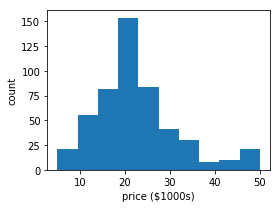

In [56]:
plt.figure(figsize=(4, 3))
plt.hist(data.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout() 

plt.show()

Let’s have a quick look to see if some features are more relevant than others for our problem:

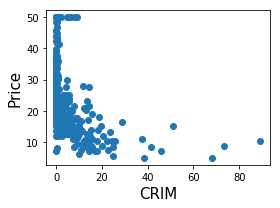

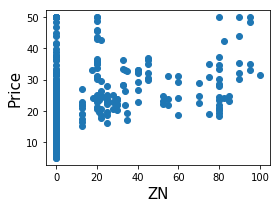

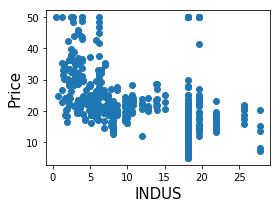

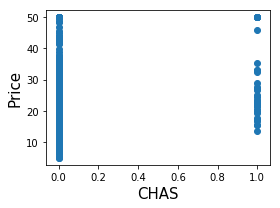

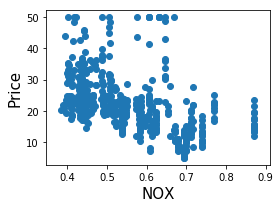

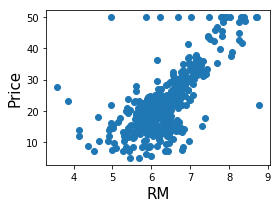

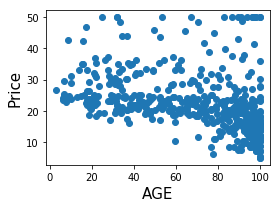

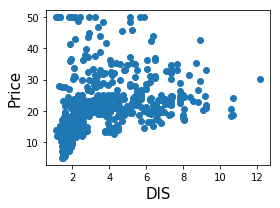

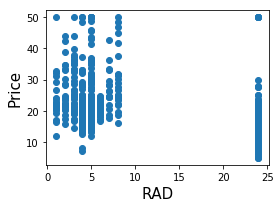

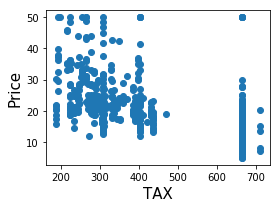

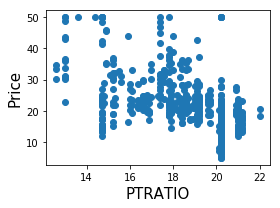

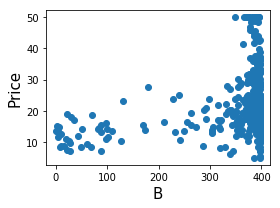

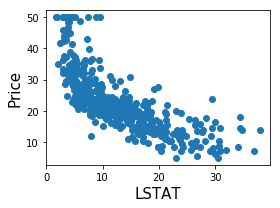

In [57]:
#Print the join histogram for each feature

for index, feature_name in enumerate(data.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(data.data[:, index], data.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

plt.show()

This is a manual version of a technique called **feature selection**.

Sometimes, in Machine Learning it is useful to use feature selection to decide which features are the most useful for a particular problem. Automated methods exist which quantify this sort of exercise of choosing the most informative features. 

### Predicting Home Prices: a Simple Linear Regression

Now we’ll use scikit-learn to perform a simple linear regression on the housing data. There are many possibilities of regressors to use. A particularly simple one is LinearRegression: this is basically a wrapper around an ordinary least squares calculation.

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

from sklearn.linear_model import LinearRegression

clf = LinearRegression()

clf.fit(X_train, y_train)


predicted = clf.predict(X_test)

expected = y_test

print("RMS: %s" % np.sqrt(np.mean((predicted - expected) ** 2))) 

RMS: 4.49923810540804


We can plot the error: expected as a function of predicted:

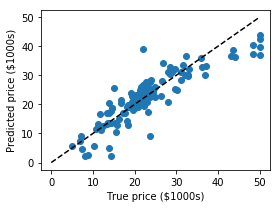

In [59]:
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

plt.show()

The prediction at least correlates with the true price, though there are clearly some biases. We could imagine evaluating the performance of the regressor by, say, computing the RMS residuals between the true and predicted price. There are some subtleties in this, however, which we’ll cover in a later section.

There are many other types of regressors available in scikit-learn: we’ll try a more powerful one here.

Use the GradientBoostingRegressor class to fit the housing data.

RMS: 3.5508852433049043 


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


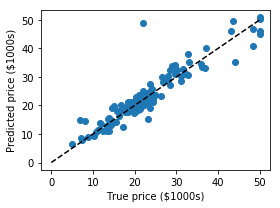

In [60]:
# Prediction with gradient boosted tree

from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

print("RMS: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

plt.show()

## <a name="measure-perf"></a>Measuring Prediction Performance

### A quick test on the K-neighbors classifier

Here we’ll continue to look at the digits data, but we’ll switch to the K-Neighbors classifier. The K-neighbors classifier is an instance-based classifier. The K-neighbors classifier predicts the label of an unknown point based on the labels of the K nearest points in the parameter space.

In [61]:
# Get the data

from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

# Instantiate and train the classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y) 

# Check the results using metrics
from sklearn import metrics

y_pred = clf.predict(X)

print(metrics.confusion_matrix(y_pred, y))

[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   0   0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0   0   0 180]]


Apparently, we’ve found a perfect classifier! But this is misleading for the reasons we saw before: the classifier essentially “memorizes” all the samples it has already seen. To really test how well this algorithm does, we need to try some samples it hasn’t yet seen.

This problem also occurs with regression models. In the following we fit an other instance-based model named “decision tree” to the Boston Housing price dataset we introduced previously:

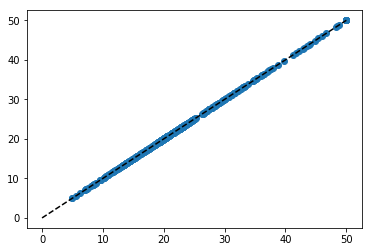

In [62]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor

data = load_boston()
clf = DecisionTreeRegressor().fit(data.data, data.target)
predicted = clf.predict(data.data)

expected = data.target
plt.scatter(expected, predicted) 
plt.plot([0, 50], [0, 50], '--k') 

plt.show()

Here again the predictions are seemingly perfect as the model was able to perfectly memorize the training set.

### A correct approach: Using a validation set

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data.

To avoid over-fitting, we have to define two different sets:

* a training set X_train, y_train which is used for learning the parameters of a predictive model
* a testing set X_test, y_test which is used for evaluating the fitted predictive model

In scikit-learn such a random split can be quickly computed with the train_test_split() function:

In [63]:
from sklearn import model_selection

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                        test_size=0.25, random_state=0)

print("%r, %r, %r" % (X.shape, X_train.shape, X_test.shape))

(1797, 64), (1347, 64), (450, 64)


Now we train on the training data, and test on the testing data:



In [64]:
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))


[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  0  0  0  0  0  0  0 48  0]
 [ 0  0  0  1  0  1  0  0  0 45]]


In [65]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       1.00      1.00      1.00        43
          2       1.00      0.98      0.99        44
          3       0.96      1.00      0.98        45
          4       1.00      1.00      1.00        38
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       1.00      1.00      1.00        48
          8       1.00      1.00      1.00        48
          9       0.98      0.96      0.97        47

avg / total       0.99      0.99      0.99       450



The averaged f1-score is often used as a convenient measure of the overall performance of an algorithm. It appears in the bottom row of the classification report; it can also be accessed directly:

In [66]:
metrics.f1_score(y_test, y_pred, average="macro")

0.9913675218842191

The over-fitting we saw previously can be quantified by computing the f1-score on the training data itself:

In [67]:
metrics.f1_score(y_train, clf.predict(X_train), average="macro")

1.0



**Note**

Regression metrics In the case of regression models, we need to use different metrics, such as explained variance. 

## <a name="param-val-test"></a>Parameter Selection, Validation, and Testing

### Model Selection via Validation

We have applied Gaussian Naives, support vectors machines, and K-nearest neighbors classifiers to the digits dataset. Now that we have these validation tools in place, we can ask quantitatively which of the three estimators works best for this dataset.

* With the default hyper-parameters for each estimator, which gives the best f1 score on the validation set? Recall that hyperparameters are the parameters set when you instantiate the classifier: for example, the n_neighbors in clf = KNeighborsClassifier(n_neighbors=1)

In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                            test_size=0.25, random_state=0)

for Model in [GaussianNB, KNeighborsClassifier, LinearSVC]:
    clf = Model().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('%s: %s' %
          (Model.__name__, metrics.f1_score(y_test, y_pred, average="macro")))  

GaussianNB: 0.8332741681010101
KNeighborsClassifier: 0.9804562804949924
LinearSVC: 0.9364145091423616


* For each classifier, which value for the hyperparameters gives the best results for the digits data? For LinearSVC, use loss='l2' and loss='l1'. For KNeighborsClassifier we use n_neighbors between 1 and 10. Note that GaussianNB does not have any adjustable hyperparameters.

In [69]:
# test SVC loss 
# (loss='l1' has been deprecated in favor of loss='hinge')
# (loss='l2' has been deprecated in favor of loss='squared_hinge')
for loss in ['hinge', 'squared_hinge']:
    clf = LinearSVC(loss=loss).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("LinearSVC(loss='{0}'): {1}".format(loss,
          metrics.f1_score(y_test, y_pred, average="macro")))

print('-------------------')

# test the number of neighbors
for n_neighbors in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("KNeighbors(n_neighbors={0}): {1}".format(n_neighbors,
        metrics.f1_score(y_test, y_pred, average="macro")))

LinearSVC(loss='hinge'): 0.9348754979819198
LinearSVC(loss='squared_hinge'): 0.9303890555083877
-------------------
KNeighbors(n_neighbors=1): 0.9913675218842191
KNeighbors(n_neighbors=2): 0.9848442068835102
KNeighbors(n_neighbors=3): 0.9867753449543099
KNeighbors(n_neighbors=4): 0.9803719053818863
KNeighbors(n_neighbors=5): 0.9804562804949924
KNeighbors(n_neighbors=6): 0.9757924194139573
KNeighbors(n_neighbors=7): 0.9780645792142071
KNeighbors(n_neighbors=8): 0.9780645792142071
KNeighbors(n_neighbors=9): 0.9780645792142071
KNeighbors(n_neighbors=10): 0.9755550897728812


### Cross-validation

Cross-validation consists in repetively splitting the data in pairs of train and test sets, called ‘folds’. Scikit-learn comes with a function to automatically compute score on all these folds. Here we do KFold with k=5.

In [70]:
clf = KNeighborsClassifier()

from sklearn.model_selection import cross_val_score

cross_val_score(clf, X, y, cv=5)

array([0.9478022 , 0.9558011 , 0.96657382, 0.98039216, 0.96338028])

We can use different splitting strategies, such as random splitting:

In [71]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5)

cross_val_score(clf, X, y, cv=cv) 

array([0.98333333, 0.98888889, 0.98333333, 0.97777778, 0.97777778])

There exists many different cross-validation strategies in scikit-learn. They are often useful to take in account non iid datasets.

### Hyperparameter optimization with cross-validation

Consider regularized linear models, such as Ridge Regression, which uses l2 regularlization, and Lasso Regression, which uses l1 regularization. Choosing their regularization parameter is important.

Let us set these parameters on the Diabetes dataset, a simple regression problem. The diabetes data consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year:

In [72]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
X, y = data.data, data.target
print(X.shape)

(442, 10)


With the default hyper-parameters: we compute the cross-validation score:


In [73]:
from sklearn.linear_model import Ridge, Lasso

for Model in [Ridge, Lasso]:
    model = Model()
    print('%s: %s' % (Model.__name__, cross_val_score(model, X, y).mean()))

Ridge: 0.40942743830329875
Lasso: 0.35380008329932017


#### Basic Hyperparameter Optimization

We compute the cross-validation score as a function of alpha, the strength of the regularization for Lasso and Ridge. We choose 20 values of alpha between 0.0001 and 1:

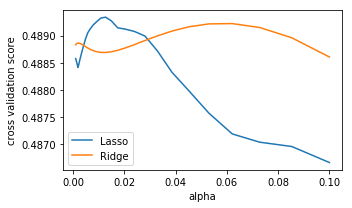

In [74]:
alphas = np.logspace(-3, -1, 30)

plt.figure(figsize=(5, 3))

for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), X, y, cv=3).mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()

plt.show()

#### Automatically Performing Grid Search

sklearn.grid_search.GridSearchCV is constructed with an estimator, as well as a dictionary of parameter values to be searched. We can find the optimal parameters this way:

In [75]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3, -1, 30)

for Model in [Ridge, Lasso]:
    gscv = GridSearchCV(Model(), dict(alpha=alphas), cv=3).fit(X, y)
    print('%s: %s' % (Model.__name__, gscv.best_params_))

Ridge: {'alpha': 0.06210169418915616}
Lasso: {'alpha': 0.01268961003167922}


#### Built-in Hyperparameter Search

For some models within scikit-learn, cross-validation can be performed more efficiently on large datasets. In this case, a cross-validated version of the particular model is included. The cross-validated versions of Ridge and Lasso are RidgeCV and LassoCV, respectively. Parameter search on these estimators can be performed as follows:

In [76]:
from sklearn.linear_model import RidgeCV, LassoCV

alphas = np.logspace(-3, -1, 30)

for Model in [RidgeCV, LassoCV]:
    model = Model(alphas=alphas, cv=3).fit(X, y)
    print('%s: %s' % (Model.__name__, model.alpha_))

RidgeCV: 0.06210169418915616
LassoCV: 0.01268961003167922


##### Nested cross-validation

How do we measure the performance of these estimators? We have used data to set the hyperparameters, so we need to test on actually new data. We can do this by running cross_val_score() on our CV objects. Here there are 2 cross-validation loops going on, this is called ‘nested cross validation’:

In [77]:
for Model in [RidgeCV, LassoCV]:
    scores = cross_val_score(Model(alphas=alphas, cv=3), X, y, cv=3)
    print(Model.__name__, np.mean(scores))

RidgeCV 0.48916142454965544
LassoCV 0.48549139668647756


**Note**

Note that these results do not match the best results of our curves above, and LassoCV seems to under-perform RidgeCV. The reason is that setting the hyper-parameter is harder for Lasso, thus the estimation error on this hyper-parameter is larger. 

### <a name="dim-reduct"></a>Unsupervised Learning: Dimensionality Reduction and Visualization

Unsupervised learning is applied on X without y: data without labels. A typical use case is to find hidden structure in the data.

### Dimensionality Reduction: PCA

Dimensionality reduction derives a set of new artificial features smaller than the original feature set. Here we’ll use Principal Component Analysis (PCA), a dimensionality reduction that strives to retain most of the variance of the original data. We’ll use sklearn.decomposition.PCA on the iris dataset:

In [78]:
X = iris.data
y = iris.target

**PCA** computes linear combinations of the original features using a truncated Singular Value Decomposition of the matrix X, to project the data onto a base of the top singular vectors.

In [79]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True)
pca.fit(X) 

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

Once fitted, PCA exposes the singular vectors in the components_ attribute:

In [80]:
pca.components_   

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

Other attributes are available as well:

In [81]:
pca.explained_variance_ratio_    

array([0.92461621, 0.05301557])

Let us project the iris dataset along those first two dimensions:

In [82]:
X_pca = pca.transform(X)
X_pca.shape

(150, 2)

PCA normalizes and whitens the data, which means that the data is now centered on both components with unit variance:

In [83]:
X_pca.mean(axis=0) 

array([-1.51508435e-15, -1.75859327e-15])

In [84]:
X_pca.std(axis=0)

array([0.99666109, 0.99666109])

Furthermore, the samples components no longer carry any linear correlation:

In [85]:
np.corrcoef(X_pca.T)  

array([[1.00000000e+00, 6.41562355e-16],
       [6.41562355e-16, 1.00000000e+00]])

With a number of retained components 2 or 3, PCA is useful to visualize the dataset:

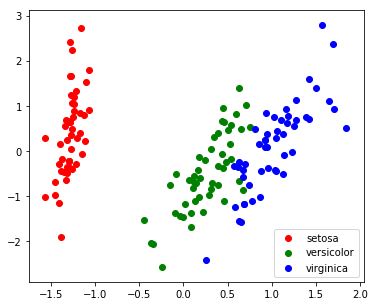

In [86]:
target_ids = range(len(iris.target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
               c=c, label=label)
plt.legend()

plt.show()

### Visualization with a non-linear embedding: tSNE

For visualization, more complex embeddings can be useful (for statistical analysis, they are harder to control). sklearn.manifold.TSNE is such a powerful manifold learning method. We apply it to the digits dataset, as the digits are vectors of dimension 8*8 = 64. Embedding them in 2D enables visualization:

In [87]:
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]

# Fit and transform with a TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)

X_2d = tsne.fit_transform(X)


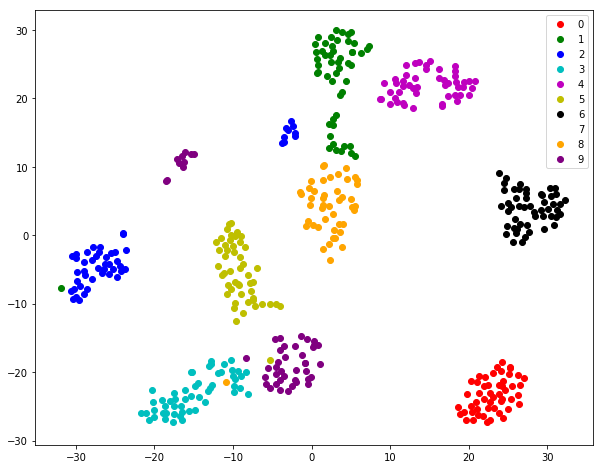

In [88]:
# Visualize the data
plt.figure(figsize=(10, 8))

target_ids = range(len(digits.target_names))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()

plt.show()

## <a name="pca-svm"></a>The Eigenfaces Example: Chaining PCA and SVMs

The goal of this example is to show how an unsupervised method and a supervised one can be chained for better prediction. It starts with a didactic but lengthy way of doing things, and finishes with the idiomatic approach to pipelining in scikit-learn.

Here we’ll take a look at a simple facial recognition example. Ideally, we would use a dataset consisting of a subset of the Labeled Faces in the Wild data that is available with sklearn.datasets.fetch_lfw_people(). However, this is a relatively large download (~200MB) so we will do the tutorial on a simpler, less rich dataset. Feel free to explore the LFW dataset.

In [89]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

In [90]:
faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [91]:
faces.DESCR

'Modified Olivetti faces dataset.\n\nThe original database was available from\n\n    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nThe version retrieved here comes in MATLAB format from the personal\nweb page of Sam Roweis:\n\n    http://www.cs.nyu.edu/~roweis/\n\nThere are ten different images of each of 40 distinct subjects. For some\nsubjects, the images were taken at different times, varying the lighting,\nfacial expressions (open / closed eyes, smiling / not smiling) and facial\ndetails (glasses / no glasses). All the images were taken against a dark\nhomogeneous background with the subjects in an upright, frontal position (with\ntolerance for some side movement).\n\nThe original dataset consisted of 92 x 112, while the Roweis version\nconsists of 64x64 images.\n'

Let’s visualize these faces to see what we’re working with

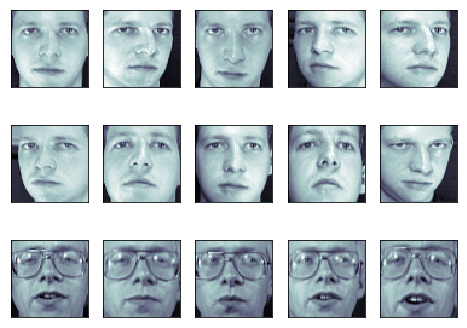

In [92]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8, 6))

# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

plt.show()

**Note**

Note is that these faces have already been localized and scaled to a common size. This is an important preprocessing piece for facial recognition, and is a process that can require a large collection of training data. This can be done in scikit-learn, but the challenge is gathering a sufficient amount of training data for the algorithm to work. Fortunately, this piece is common enough that it has been done. One good resource is OpenCV, the Open Computer Vision Library.

We’ll perform a Support Vector classification of the images. We’ll do a typical train-test split on the images:

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


### Preprocessing: Principal Component Analysis

1850 dimensions is a lot for SVM. We can use PCA to reduce these 1850 features to a manageable size, while maintaining most of the information in the dataset.

In [94]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

One interesting part of PCA is that it computes the “mean” face, which can be interesting to examine:

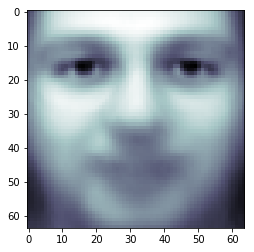

In [95]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape), cmap=plt.cm.bone)

plt.show()

The principal components measure deviations about this mean along orthogonal axes.

In [96]:
print(pca.components_.shape)

(150, 4096)


It is also interesting to visualize these principal components:

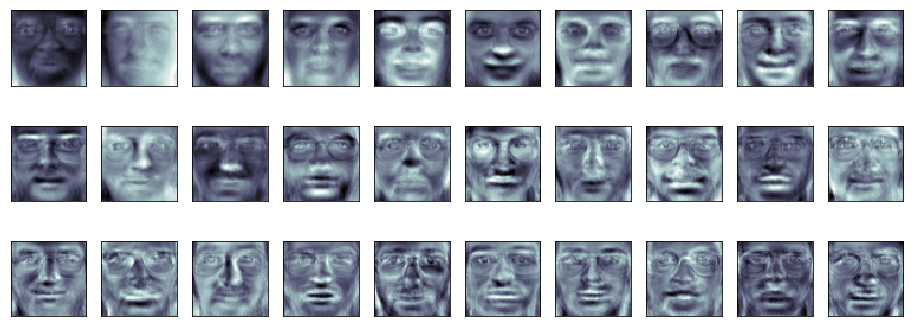

In [97]:
fig = plt.figure(figsize=(16, 6))

for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

plt.show()

The components (“eigenfaces”) are ordered by their importance from top-left to bottom-right. We see that the first few components seem to primarily take care of lighting conditions; the remaining components pull out certain identifying features: the nose, eyes, eyebrows, etc.

With this projection computed, we can now project our original training and test data onto the PCA basis:

In [98]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 150)


In [99]:
print(X_test_pca.shape)

(100, 150)


These projected components correspond to factors in a linear combination of component images such that the combination approaches the original face.

### Doing the Learning: Support Vector Machines

Now we’ll perform support-vector-machine classification on this reduced dataset:

In [100]:
from sklearn import svm

clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Finally, we can evaluate how well this classification did. First, we might plot a few of the test-cases with the labels learned from the training set:

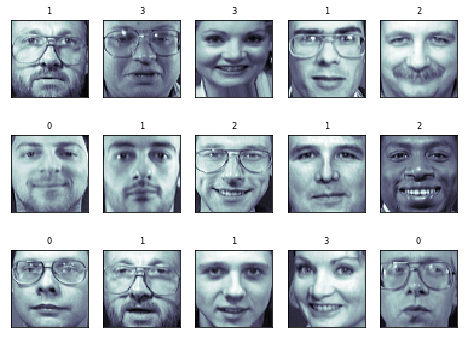

In [101]:
import numpy as np

fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(faces.target[y_pred],
                 fontsize='small', color=color)

plt.show()

The classifier is correct on an impressive number of images given the simplicity of its learning model! Using a linear classifier on 150 features derived from the pixel-level data, the algorithm correctly identifies a large number of the people in the images.

Again, we can quantify this effectiveness using one of several measures from sklearn.metrics. First we can do the classification report, which shows the precision, recall and other measures of the “goodness” of the classification:

In [102]:
from sklearn import metrics

y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.67      0.80         6
          1       1.00      1.00      1.00         4
          2       0.50      1.00      0.67         2
          3       1.00      1.00      1.00         1
          4       0.50      1.00      0.67         1
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         4
          7       1.00      0.67      0.80         3
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         5
         15       0.75      1.00      0.86         3
         17       1.00      1.00      1.00         6
         19       1.00      1.00      1.00         4
         20       1.00      1.00      1.00   

Another interesting metric is the confusion matrix, which indicates how often any two items are mixed-up. The confusion matrix of a perfect classifier would only have nonzero entries on the diagonal, with zeros on the off-diagonal:



In [103]:
import sys

np.set_printoptions(threshold=sys.maxsize)
print(metrics.confusion_matrix(y_test, y_pred))

[[4 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 

### Pipelining

Above we used PCA as a pre-processing step before applying our support vector machine classifier. Plugging the output of one estimator directly into the input of a second estimator is a commonly used pattern; for this reason scikit-learn provides a Pipeline object which automates this process. The above problem can be re-expressed as a pipeline as follows:

In [104]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),
                ('svm', svm.LinearSVC(C=1.0))])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))

[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 

## <a name="rnd-forest">Ensemble Learning: Random Forest

Random forest is a type of supervised machine learning algorithm based on ensemble learning. Ensemble learning is a type of learning where you join different types of algorithms or same algorithm multiple times to form a more powerful prediction model. The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest". The random forest algorithm can be used for both regression and classification tasks. 

### How the Random Forest Algorithm Works

The following are the basic steps involved in performing the random forest algorithm:

* Pick N random records from the dataset.
* Build a decision tree based on these N records.
* Choose the number of trees you want in your algorithm and repeat steps 1 and 2.
* In case of a regression problem, for a new record, each tree in the forest predicts a value for Y (output). The final value can be calculated by taking the average of all the values predicted by all the trees in forest. Or, in case of a classification problem, each tree in the forest predicts the category to which the new record belongs. Finally, the new record is assigned to the category that wins the majority vote.

Advantages of using Random Forest

As with any algorithm, there are advantages and disadvantages to using it. In the next two sections we'll take a look at the pros and cons of using random forest for classification and regression.

* The random forest algorithm is not biased, since, there are multiple trees and each tree is trained on a subset of data. Basically, the random forest algorithm relies on the power of "the crowd"; therefore the overall biasedness of the algorithm is reduced.
* This algorithm is very stable. Even if a new data point is introduced in the dataset the overall algorithm is not affected much since new data may impact one tree, but it is very hard for it to impact all the trees.
* The random forest algorithm works well when you have both categorical and numerical features.
* The random forest algorithm also works well when data has missing values or it has not been scaled well (although we have performed feature scaling in this article just for the purpose of demonstration).

Disadvantages of using Random Forest

* A major disadvantage of random forests lies in their complexity. They required much more computational resources, owing to the large number of decision trees joined together.
* Due to their complexity, they require much more time to train than other comparable algorithms.
 

### Using Random Forest for Regression

#### Problem Definition

The problem here is to predict the gas consumption (in millions of gallons) in 48 of the US states based on petrol tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with the driving license.


#### Solution

To solve this regression problem we will use the random forest algorithm via the Scikit-Learn Python library. We will follow the traditional machine learning pipeline to solve this problem. Follow these steps:

Importing Dataset

The dataset for this problem is available at:

https://drive.google.com/file/d/1mVmGNx6cbfvRHCDvF12ZL3wGLSHD9f/view

Or from:

https://github.com/bansalkanav/ML_notes/blob/master/10.%20Linear%20Regression/petrol_consumption.csv

For the sake of this tutorial, the dataset has been downloaded into the "Datasets" folder of the "D" Drive. You'll need to change the file path according to your own setup.

Execute the following command to import the dataset:

In [105]:
dataset = pd.read_csv('../data/petrol_consumption.csv')  

To get a high-level view of what the dataset looks like, execute the following command:

In [106]:
dataset.head()  

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


We can see that the values in our dataset are not very well scaled. We will scale them down before training the algorithm.

#### Preparing Data For Training

Two tasks will be performed in this section. The first task is to divide data into 'attributes' and 'label' sets. The resultant data is then divided into training and test sets.

The following script divides data into attributes and labels:

The first task is to divide data into 'attributes' and 'label' sets. The resultant data is then divided into training and test sets.

The following script divides data into attributes and labels:

In [107]:
X = dataset.iloc[:, 0:4].values  
y = dataset.iloc[:, 4].values  

Finally, let's divide the data into training and testing sets:

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

#### Feature Scaling

We know our dataset is not yet a scaled value, for instance the Average_Income field has values in the range of thousands while Petrol_tax has values in range of tens. Therefore, it would be beneficial to scale our data (although, as mentioned earlier, this step isn't as important for the random forests algorithm). To do so, we will use Scikit-Learn's StandardScaler class. Execute the following code to do so:

In [109]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

#### Training the Algorithm

Now that we have scaled our dataset, it is time to train our random forest algorithm to solve this regression problem. Execute the following code:

In [110]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

The RandomForestRegressor class of the sklearn.ensemble library is used to solve regression problems via random forest. The most important parameter of the RandomForestRegressor class is the n_estimators parameter. This parameter defines the number of trees in the random forest. We will start with n_estimator=20 to see how our algorithm performs.

#### Evaluating the Algorithm

The last and final step of solving a machine learning problem is to evaluate the performance of the algorithm. For regression problems the metrics used to evaluate an algorithm are mean absolute error, mean squared error, and root mean squared error. Execute the following code to find these values:

In [111]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 51.76500000000001
Mean Squared Error: 4216.166749999999
Root Mean Squared Error: 64.93201637097064


With 20 trees, the root mean squared error is 64.93 which is greater than 10 percent of the average petrol consumption i.e. 576.77. This may indicate, among other things, that we have not used enough estimators (trees).

If the number of estimators is changed to 200, the results are as follows:

In [112]:
regressor = RandomForestRegressor(n_estimators=200, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

In [113]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 47.9825
Mean Squared Error: 3469.7007375000007
Root Mean Squared Error: 58.90416570583103


### Using Random Forest for Classification


#### Problem Definition

The task here is to predict whether a bank currency note is authentic or not based on four attributes i.e. variance of the image wavelet transformed image, skewness, entropy, and curtosis of the image.


#### Solution

This is a binary classification problem and we will use a random forest classifier to solve this problem. Steps followed to solve this problem will be similar to the steps performed for regression.

#### Importing Dataset

The dataset can be downloaded from the following link:

https://drive.google.com/file/d/13nw-uRXPY8XIZQxKRNZ3yYlho-CYm_Qt/view

Or from https://github.com/jbrownlee/Datasets/blob/master/banknote_authentication.csv

The detailed information about the data is available at the following link:

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

The following code imports the dataset:

In [114]:
dataset = pd.read_csv("../data/banknote_authentication.csv")  

#To get a high level view of the dataset, execute the following command:
dataset.head()  

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


As was the case with regression dataset, values in this dataset are not very well scaled. The dataset will be scaled before training the algorithm.

#### Preparing Data For Training

The following code divides data into attributes and labels:

In [115]:
X = dataset.iloc[:, 0:4].values  
y = dataset.iloc[:, 4].values  

In [116]:
#The following code divides data into training and testing sets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

#### Feature Scaling

As with before, feature scaling works the same way:

In [117]:
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

#### Training the Algorithm

And again, now that we have scaled our dataset, we can train our random forests to solve this classification problem. To do so, execute the following code:

In [118]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  

In case of regression we used the RandomForestRegressor class of the sklearn.ensemble library. For classification, we will RandomForestClassifier class of the sklearn.ensemble library. RandomForestClassifier class also takes n_estimators as a parameter. Like before, this parameter defines the number of trees in our random forest. We will start with 20 trees again.

#### Evaluating the Algorithm

For classification problems the metrics used to evaluate an algorithm are accuracy, confusion matrix, precision recall, and F1 values. Execute the following script to find these values:

In [119]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

[[155   2]
 [  1 117]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       157
          1       0.98      0.99      0.99       118

avg / total       0.99      0.99      0.99       275

0.9890909090909091


The accuracy achieved for by our random forest classifier with 20 trees is 98.90%. Unlike before, changing the number of estimators for this problem didn't significantly improve the results

In [120]:
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

[[155   2]
 [  1 117]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       157
          1       0.98      0.99      0.99       118

avg / total       0.99      0.99      0.99       275

0.9890909090909091


98.90% is a pretty good accuracy, so there isn't much point in increasing our number of estimators anyway.

**To know more about ensamble method**, read these article: 

- "Bootstrap Aggregation, Random Forests and Boosted Trees"  https://www.quantstart.com/articles/bootstrap-aggregation-random-forests-and-boosted-trees

- "Using Bagging and Boosting to Improve Classification Tree Accuracy"
https://towardsdatascience.com/using-bagging-and-boosting-to-improve-classification-tree-accuracy-6d3bb6c95e5b

- "Gradient Boosting in python using scikit-learn" http://benalexkeen.com/gradient-boosting-in-python-using-scikit-learn/